**Double mass for hydrogeological measurement data**

Based on the code and data from: https://github.com/loicduffar/Homegeneity-test-for-hydrologic-time-series

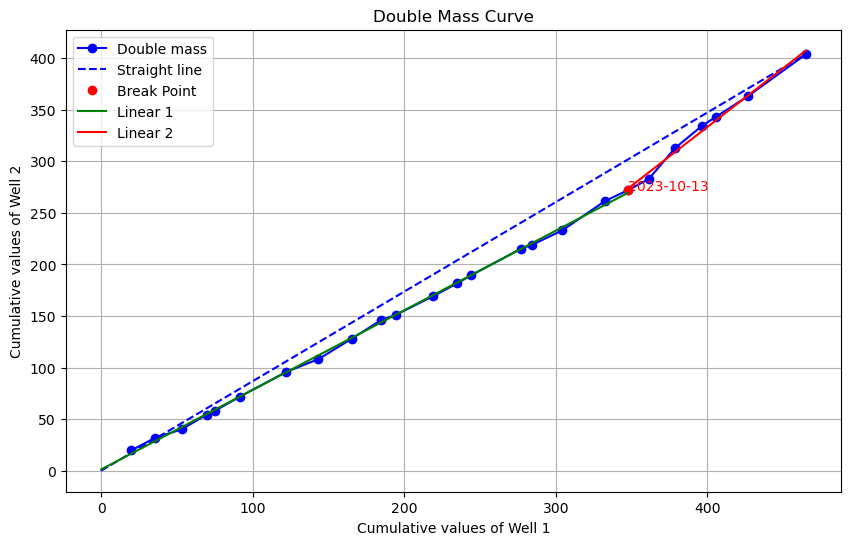

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Create a DataFrame from the measurement data
data = {
    'Date': ['2022-05-15', '2022-06-14', '2022-07-18', '2022-08-17', '2022-09-13', '2022-10-16', '2022-11-15', '2022-12-14', '2023-01-13', '2023-02-16', '2023-03-14', '2023-04-16', '2023-04-13', '2023-05-15', '2023-06-16', '2023-07-15', '2023-08-12', '2023-09-09', '2023-10-13', '2023-11-11', '2023-12-18', '2024-01-15', '2024-02-10', '2024-03-12', '2024-04-15'],
    'Well1': [19.73, 15.80, 17.52, 16.58, 5.33, 16.45, 30.67, 21.22, 21.96, 19.34, 9.87, 24.81, 15.53, 9.35, 32.75, 7.57, 19.72, 28.33, 15.04, 13.65, 17.42, 17.82, 9.41, 21.13, 37.85],
    'Well2': [19.61, 12.29, 8.12, 14.39, 3.53, 13.8, 24.03, 12.4, 19.7, 18.1, 5.13, 18.3, 12.20, 7.94, 25.58, 4.06, 13.76, 28.64, 10.41, 10.68, 30.15, 21.60, 8.96, 20.01, 40.25]
}
df_in = pd.DataFrame(data)

# Data treatment
df = df_in[ (~np.isnan(df_in['Well1'])) & (~np.isnan(df_in['Well2'])) ]  # Mask for the dataframe to eliminate missing years
cumul = df.cumsum()  # Double Mass Dataframe for each couple of Time Series

# Search the break point 
coef1 = []
coef2 = []
res1=[]
res2=[]
index = df.index[2:-2]
for an in index[:]:  # Loop under each row of the Double Mass Dataframe
    coef1.append(list(np.polyfit( cumul.loc[:an]['Well1'], cumul.loc[:an]['Well2'], 1, full=True)[0]))
    coef2.append(list(np.polyfit( cumul.loc[an:]['Well1'], cumul.loc[an:]['Well2'], 1, full=True)[0]))
    res1.append(np.polyfit( cumul.loc[:an]['Well1'], cumul.loc[:an]['Well2'], 1, full=True)[1][0])
    res2.append(np.polyfit( cumul.loc[an:]['Well1'], cumul.loc[an:]['Well2'], 1, full=True)[1][0])
index_break = pd.DataFrame(np.sum(np.array([res1, res2]), 0), index=index[:], columns=['residual']).idxmin()
coef_per1 = pd.DataFrame(np.array(coef1), index=index, columns=['a', 'b']).loc[index_break]
coef_per2 = pd.DataFrame(np.array(coef2), index=index, columns=['a', 'b']).loc[index_break]
index_break = index_break[0]

coef = pd.concat([coef_per1, coef_per2])
coef = pd.DataFrame(coef.values, index=['Before '+str(index_break), 'After '+str(index_break)],
                    columns=['a', 'b'])

# Plot  
plt.figure(figsize=(10, 6))
plt.plot(cumul['Well1'], cumul['Well2'], 'bo-', label="Double mass")
plt.plot([0, cumul['Well1'].max()], [0, cumul['Well2'].max()], 'b--', label="Straight line")
x = cumul['Well1'][index_break]
plt.plot([x], [cumul['Well2'][index_break]], 'ro', label='Break Point')
plt.text(x, cumul['Well2'][index_break], str(df_in['Date'][index_break]), position=(x, cumul['Well2'][index_break]), color="red")
y = coef.iloc[0][1] + coef.iloc[0][0]*x
plt.plot([0,  x], [coef.iloc[0][1], y], 'g-', label='Linear 1')
y = coef.iloc[1][1] + coef.iloc[1][0]*x
x2 = cumul['Well1'].max()
y2 = coef.iloc[1][1] + coef.iloc[1][0]*x2
plt.plot([x,  x2], [y, y2], 'r-', label='Linear 2')

plt.xlabel('Cumulative values of Well 1')
plt.ylabel('Cumulative values of Well 2')
plt.title('Double Mass Curve')
plt.legend()
plt.grid(True)
plt.show()
